In [12]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
import seaborn as sns

### Configuraciones librerias

In [13]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Funciones auxiliares

In [14]:
font_size = 18

def crear_radar(categorias, datos_a, datos_b, leyenda_a, leyenda_b, titulo):
    #Basado en https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
    N = len(categorias)
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]

    ax = plt.subplot(111, polar=True)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angulos[:-1], categorias)
    
    ax.set_rlabel_position(0)
    plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
    plt.ylim(0,5)
    
    values = list(datos_a)
    values += values[:1]
    ax.plot(angulos, values, linewidth=2, linestyle='solid', markerfacecolor='blue', label=leyenda_a)
    ax.fill(angulos, values, 'b', alpha=0.1)

    values = list(datos_b)
    values += values[:1]
    ax.plot(angulos, values, linewidth=2, linestyle='solid', markerfacecolor='yellow',label=leyenda_b)
    ax.fill(angulos, values, 'y', alpha=0.1)
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.title(titulo, size=font_size, y=1.1)

def crear_mapa(series, caracteristica,vmin, vmax, titulo, color):
    #Creo mi mapa de mexico
    mexico = geopandas.read_file('Data/mexstates.shp') #Los estados pueden ser vistos con mexico.ADMIN_NAME

    #Le pongo los tildes al archivo de estados para que me coincidan con las provincias
    mexico["ADMIN_NAME"].replace({'Nuevo Leon': "Nuevo León",
                               "San Luis Potosi": "San luis Potosí",
                               "Queretaro": "Querétaro",
                               "Yucatan": "Yucatán",
                               "Michoacan": "Michoacán",
                               "Mexico": "Edo. de México",
                               "Baja California": "Baja California Norte"}, inplace=True)

    #Hago un nuevo dataframe con la información del mapa y la antiguedad para cada provincia
    gdf = mexico.set_index("ADMIN_NAME").join(series)
    
    #Grafico el mapa

    #Base donde se va a dibujar
    fig, base = plt.subplots(1, figsize=(10, 6))

    #Saco los ejes de lat y lng ya que no aportan al gráfico
    base.axis("off")

    #Pido que me coloreé en base a la antiguedad
    gdf.plot(column=caracteristica, cmap=color, linewidth=0.8, ax=base, edgecolor="0.8")

    #Setteo el título al gráfico
    base.set_title(titulo, fontsize = font_size)
    
    #Agrego la barra que indica la antiguedad
    sm = plt.cm.ScalarMappable(cmap="cividis_r", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm)

### Carga optimizada del set de datos

In [15]:
df = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \
                'tipodepropiedad' : 'category', \
                'provincia' : 'category', \
                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

df = df.dropna(subset=['provincia'])
df = df.dropna(subset=['antiguedad'])

df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28,False,False,False,True,True,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17,False,False,False,False,False,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09,False,False,False,True,True,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07,False,False,False,False,False,"1,150,000.00"
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,...,"23,650.00",19.30,-99.15,2014-03-18,False,False,False,False,True,"1,100,000.00"


## Ubicación de las propiedades más antiguas y más nuevas

### Top 50 propiedades más antiguas

In [16]:
propiedades_mas_antiguas_df = df.nlargest(50, ["antiguedad"])
propiedades_mas_antiguas_df[["provincia", "ciudad", "tipodepropiedad", "antiguedad"]]

,provincia,ciudad,tipodepropiedad,antiguedad
17187,Distrito Federal,Alvaro Obregón,Casa,80.00
22382,Distrito Federal,Cuauhtémoc,Casa,80.00
29801,Distrito Federal,Gustavo A. Madero,Apartamento,80.00
49686,Distrito Federal,Miguel Hidalgo,Casa,80.00
57696,Distrito Federal,Cuauhtémoc,Apartamento,80.00
64234,Distrito Federal,Cuauhtémoc,Edificio,80.00
65640,Distrito Federal,Cuauhtémoc,Casa,80.00
69919,Distrito Federal,Cuauhtémoc,Casa,80.00
97548,Distrito Federal,Cuauhtémoc,Casa,80.00
116874,Aguascalientes,Aguascalientes,Casa,80.00


### Top 50 propiedades más nuevas

In [17]:
propiedades_mas_nuevas_df = df.nsmallest(50, ["antiguedad"])
propiedades_mas_nuevas_df[["provincia", "ciudad", "tipodepropiedad", "antiguedad"]]

,provincia,ciudad,tipodepropiedad,antiguedad
10,San luis Potosí,San Luis Potosí,Casa,0.00
12,Querétaro,Querétaro,Casa,0.00
16,Querétaro,Querétaro,Casa,0.00
19,Querétaro,Querétaro,Casa,0.00
20,Nuevo León,Monterrey,Terreno,0.00
22,Tamaulipas,Ciudad Madero,Casa,0.00
30,Tamaulipas,Ciudad Madero,Apartamento,0.00
33,San luis Potosí,San Luis Potosí,Casa,0.00
35,Morelos,Emiliano Zapata,Casa en condominio,0.00
48,Querétaro,Querétaro,Casa,0.00


### Comparación de las características promedios de ambos tops:

In [18]:
categorias = ["habitaciones", "banos", "piscina", "garages", "gimnasio", "usosmultiples"]
caract_propiedades_mas_antiguas = propiedades_mas_antiguas_df[categorias].mean()
caract_propiedades_mas_nuevas = propiedades_mas_nuevas_df[categorias].mean()

In [19]:
caract_propiedades_mas_antiguas_df = caract_propiedades_mas_antiguas.to_frame()
caract_propiedades_mas_antiguas_df.columns = ["promedio"]
caract_propiedades_mas_antiguas_df

,promedio
habitaciones,3.95
banos,2.10
piscina,0.02
garages,1.05
gimnasio,0.02
usosmultiples,0.02


In [20]:
caract_propiedades_mas_nuevas_df = caract_propiedades_mas_nuevas.to_frame()
caract_propiedades_mas_nuevas_df.columns = ["promedio"]
caract_propiedades_mas_nuevas_df

,promedio
habitaciones,2.98
banos,2.14
piscina,0.12
garages,1.72
gimnasio,0.10
usosmultiples,0.18


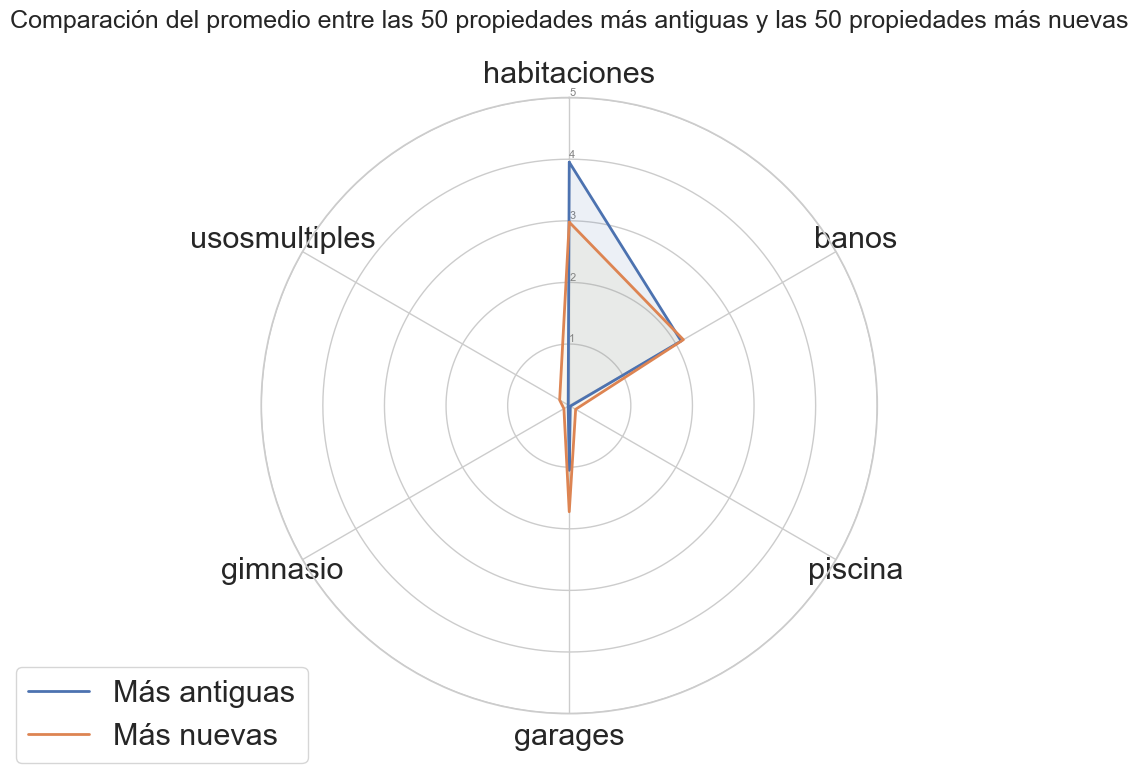

In [21]:
crear_radar(categorias, caract_propiedades_mas_antiguas, caract_propiedades_mas_nuevas,
           "Más antiguas", "Más nuevas", "Comparación del promedio entre las 50 propiedades más antiguas y las 50 propiedades más nuevas")

### Ubicación de las provincias más antiguas y más nuevas

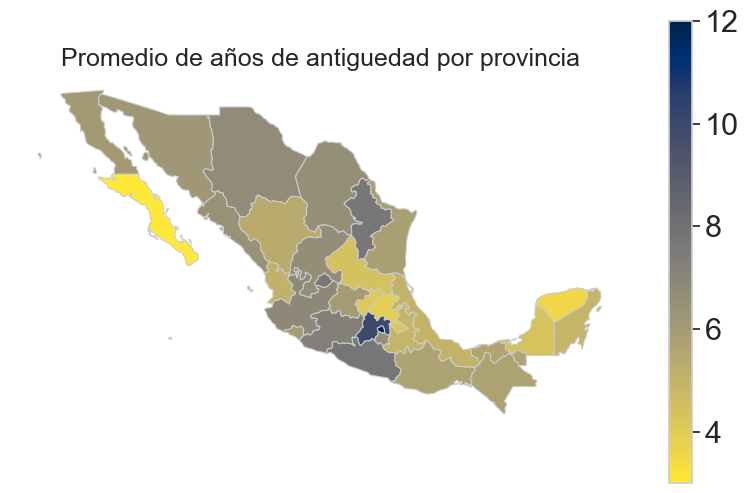

In [22]:
provincia_antiguedad = df.groupby("provincia")["antiguedad"].mean()

crear_mapa(provincia_antiguedad, "antiguedad", 3, 12, "Promedio de años de antiguedad por provincia", "cividis_r")